# QUESTION 1


### Introduction:

## Special thanks to: https://github.com/justmarkham for sharing the dataset and
## materials.
## Occupations
### Step 1. Import the necessary libraries
### Step 2. Import the dataset from this address.
### Step 3. Assign it to a variable called users
### Step 4. Discover what is the mean age per occupation
### Step 5. Discover the Male ratio per occupation and sort it from the most to the least
### Step 6. For each occupation, calculate the minimum and maximum ages
### Step 7. For each combination of occupation and sex, calculate the mean age
### Step 8. For each occupation present the percentage of women and men


In [2]:
# Step 1: Insert the libraries
import pandas as pd
import numpy as np

In [3]:
# Step 2: Import the dataset from the given address
dataset = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

In [4]:
# Step 3: Assign it to a variable called users
users = pd.read_csv(dataset, delimiter='|')

In [5]:
# Step 4: Discover the mean age per occupation
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print("Mean age per occupation:")
print(mean_age_per_occupation)

Mean age per occupation:
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [6]:
# Step 5: Discover the male ratio per occupation and sort it from most to least
male_ratio_by_occupation = users.groupby('occupation')['gender'].apply(lambda x: (x == 'M').sum() / x.count()).sort_values(ascending=False)
print("\nMale ratio per occupation (sorted from most to least):")
print(male_ratio_by_occupation)


Male ratio per occupation (sorted from most to least):
occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender, dtype: float64


In [7]:
# Step 6: Calculate the minimum and maximum ages for each occupation
min_max_age_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print("\nMinimum and maximum ages per occupation:")
print(min_max_age_per_occupation)


Minimum and maximum ages per occupation:
               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [8]:
# Step 7: Calculate the mean age for each combination of occupation and gender
mean_age_by_gender_and_occupation = users.groupby(['occupation', 'gender'])['age'].mean()
print("\nMean age for each combination of occupation and gender:")
print(mean_age_by_gender_and_occupation)


Mean age for each combination of occupation and gender:
occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
           

In [9]:
# Step 8: Calculate the percentage of women and men for each occupation
gender_counts = users.groupby(['occupation', 'gender']).size()
occupation_totals = users.groupby('occupation').size()
women_percentage = gender_counts.loc[:, 'F'] / occupation_totals * 100
men_percentage = gender_counts.loc[:, 'M'] / occupation_totals * 100
gender_percentages = pd.DataFrame({'Percentage Women': women_percentage, 'Percentage Men': men_percentage})
print("\nPercentage of women and men per occupation:")
print(gender_percentages)


Percentage of women and men per occupation:
               Percentage Women  Percentage Men
occupation                                     
administrator         45.569620       54.430380
artist                46.428571       53.571429
doctor                      NaN      100.000000
educator              27.368421       72.631579
engineer               2.985075       97.014925
entertainment         11.111111       88.888889
executive              9.375000       90.625000
healthcare            68.750000       31.250000
homemaker             85.714286       14.285714
lawyer                16.666667       83.333333
librarian             56.862745       43.137255
marketing             38.461538       61.538462
none                  44.444444       55.555556
other                 34.285714       65.714286
programmer             9.090909       90.909091
retired                7.142857       92.857143
salesman              25.000000       75.000000
scientist              9.677419       90.32

# Question 2
## Euro Teams
### Step 1. Import the necessary libraries
### Step 2. Import the dataset from this address
### Step 3. Assign it to a variable called euro12
### Step 4. Select only the Goal column
### Step 5. How many team participated in the Euro2012?
### Step 6. What is the number of columns in the dataset?
### Step 7. View only the columns Team, Yellow Cards and Red Cards and assign themto a dataframe called discipline
### Step 8. Sort the teams by Red Cards, then to Yellow Cards
### Step 9. Calculate the mean Yellow Cards given per Team
### Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that startwith G
### Step 12. Select the first 7 columns
### Step 13. Select all columns except the last 3
### Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [10]:
# Step 1: Import the necessary libraries.
import pandas as pd

In [11]:
# Step 2: Import the dataset from the provided address.
dataset_address = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'

In [12]:
# Step 3: Assign it to a variable called euro12.
euro12 = pd.read_csv(dataset_address)

In [13]:
# Step 4: Select only the Goal column.
goals_column = euro12['Goals']
print("Goals column:")
print(goals_column)

Goals column:
0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


In [14]:
# Step 5: How many teams participated in the Euro2012?
num_teams = euro12.shape[0]
print("\nNumber of teams participated in Euro2012:", num_teams)


Number of teams participated in Euro2012: 16


In [15]:
# Step 6: What is the number of columns in the dataset?
num_columns = euro12.shape[1]
print("\nNumber of columns in the dataset:", num_columns)


Number of columns in the dataset: 35


In [16]:
# Step 7: View only the columns Team, Yellow Cards, and Red Cards and assign them to a dataframe called discipline.
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print("\nDiscipline dataframe:")
print(discipline)


Discipline dataframe:
                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


In [17]:
# Step 8: Sort the teams by Red Cards, then by Yellow Cards.
discipline_sorted = discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=False)
print("\nTeams sorted by Red Cards, then by Yellow Cards:")
print(discipline_sorted)


Teams sorted by Red Cards, then by Yellow Cards:
                   Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0
13                Spain            11          0
0               Croatia             9          0
1        Czech Republic             7          0
14               Sweden             7          0
4                France             6          0
12               Russia             6          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
2               Denmark             4          0
5               Germany             4          0


In [18]:
# Step 9: Calculate the mean Yellow Cards given per Team.
mean_yellow_cards = euro12['Yellow Cards'].mean()
print("\nMean Yellow Cards given per Team:", mean_yellow_cards)


Mean Yellow Cards given per Team: 7.4375


In [19]:
# Step 10: Filter teams that scored more than 6 goals.
more_than_six_goals = euro12[euro12['Goals'] > 6]['Team']
print("\nTeams that scored more than 6 goals:")
print(more_than_six_goals)


Teams that scored more than 6 goals:
5     Germany
13      Spain
Name: Team, dtype: object


In [20]:
# Step 11: Select the teams that start with G.
teams_starting_with_G_names_only = euro12[euro12['Team'].str.startswith('G')]['Team']
print("\nTeams that start with G:")
print(teams_starting_with_G_names_only)


Teams that start with G:
5    Germany
6     Greece
Name: Team, dtype: object


In [21]:
# Step 12: Select the first 7 columns.
first_seven_columns = euro12.iloc[:, :7]
print("\nFirst 7 columns:")
first_seven_columns


First 7 columns:


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [22]:
# Step 13: Select all columns except the last 3.
all_except_last_three = euro12.iloc[:, :-3]
print("\nAll columns except the last 3:")
all_except_last_three


All columns except the last 3:


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [23]:
# Step 14: Present only the Shooting Accuracy from England, Italy, and Russia.
shooting_accuracy = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]
print("\nShooting Accuracy from England, Italy, and Russia:")
print(shooting_accuracy)


Shooting Accuracy from England, Italy, and Russia:
       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


# Question 3
## Housing
## Step 1. Import the necessary libraries
## Step 2. Create 3 differents Series, each of length 100, as follows:
## • The first a random number from 1 to 4
## • The second a random number from 1 to 3
## • The third a random number from 10,000 to 30,000
## Step 3. Create a DataFrame by joinning the Series by column
## Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
## Step 5. Create a one column DataFrame with the values of the 3 Series and assign itto 'bigcolumn'
## Step 6. Ops it seems it is going only until index 99. Is it true?
## Step 7. Reindex the DataFrame so it goes from 0 to 299

In [29]:
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np

In [30]:
# Step 2: Generate 3 different Series
series_1 = pd.Series(np.random.randint(1, 5, size=100))
series_2 = pd.Series(np.random.randint(1, 4, size=100))
series_3 = pd.Series(np.random.randint(10000, 30001, size=100))

In [31]:
# Step 3: Combine the Series into a DataFrame
data_frame = pd.concat([series_1, series_2, series_3], axis=1)
print("DataFrame created by joining Series by column:")
data_frame

DataFrame created by joining Series by column:


,0,1,2
0,3,1,12653
1,4,1,15794
2,1,2,27859
3,2,3,29823
4,4,1,10788
...,...,...,...
95,2,2,28442
96,3,3,27666
97,4,1,19440
98,2,1,19244


In [32]:
# Step 4: Change the name of the columns to bedrs, bathrs, price_sqr_meter.
data_frame.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
data_frame

,bedrs,bathrs,price_sqr_meter
0,3,1,12653
1,4,1,15794
2,1,2,27859
3,2,3,29823
4,4,1,10788
...,...,...,...
95,2,2,28442
96,3,3,27666
97,4,1,19440
98,2,1,19244


In [33]:
# Step 5: Create a one-column DataFrame by concatenating the Series
combined_column = pd.concat([series_1, series_2, series_3], ignore_index=True)
combined_column = pd.DataFrame(combined_column, columns=['combined_column'])
print("\nOne-column DataFrame 'combined_column':")
print(combined_column)


One-column DataFrame 'combined_column':
     combined_column
0                  3
1                  4
2                  1
3                  2
4                  4
..               ...
295            28442
296            27666
297            19440
298            19244
299            18735

[300 rows x 1 columns]


In [34]:
# Step 6: Check the index range
print("\nIs the index going only until 99?", combined_column.index.max() == 99)


Is the index going only until 99? False


In [35]:
# Step 7: Reindex the DataFrame to range from 0 to 299
combined_column = combined_column.reset_index(drop=True)
print("\nReindexed combined_column':")
print(combined_column)


Reindexed combined_column':
     combined_column
0                  3
1                  4
2                  1
3                  2
4                  4
..               ...
295            28442
296            27666
297            19440
298            19244
299            18735

[300 rows x 1 columns]


# Question 4
## Wind Statistics
### The data have been modified to contain some missing values, identified by NaN.
### Using pandas should make this exercise easier, in particular for the bonus question.
### You should be able to perform all of these operations without using a for loop or
### other looping construct.
### The data in 'wind.data' has the following format:
### Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL
### MAL
### 61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
### 61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
### 61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
### The first three columns are year, month, and day. The remaining 12 columns are
### average windspeeds in knots at 12 locations in Ireland on that day.
### Step 1. Import the necessary libraries
### Step 2. Import the dataset from the attached file wind.txt
### Step 3. Assign it to a variable called data and replace the first 3 columns by a proper
### datetime index.
### Step 4. Year 2061? Do we really have data from this year? Create a function to fix it
### and apply it.
### Step 5. Set the right dates as the index. Pay attention at the data type, it should be
### datetime64[ns].
### Step 6. Compute how many values are missing for each location over the entire
### record.They should be ignored in all calculations below.
### Step 7. Compute how many non-missing values there are in total.
### Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and
### all the times.
### A single number for the entire dataset.
### Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
### windspeeds and standard deviations of the windspeeds at each location over all the
### days
### A different set of numbers for each location.
### Step 10. Create a DataFrame called day_stats and calculate the min, max and mean
### windspeed and standard deviations of the windspeeds across all the locations at each
### day.
### A different set of numbers for each day.
### Step 11. Find the average windspeed in January for each location.
### Treat January 1961 and January 1962 both as January.
### Step 12. Downsample the record to a yearly frequency for each location.
### Step 13. Downsample the record to a monthly frequency for each location.
### Step 14. Downsample the record to a weekly frequency for each location.
### Step 15. Calculate the min, max and mean windspeeds and standard deviations of the
### windspeeds across all locations for each week (assume that the first week starts on
### January 2 1961) for the first 52 weeks.

In [36]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np

In [40]:
# Step 2: Import the dataset from the provided file
data = pd.read_csv('wind.txt', delim_whitespace=True, na_values='NaN')

In [41]:
# Step 3: Replace the first 3 columns by a proper datetime index
data['Date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].astype(str).agg('-'.join, axis=1))
data = data.set_index('Date')
data = data.drop(['Yr', 'Mo', 'Dy'], axis=1)
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [42]:
# Step 4: Function to fix the year and apply it
def fix_year(x):
    if x.year > 2000:
        return x - pd.DateOffset(years=100)
    return x

data.index = data.index.map(fix_year)
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [43]:
# Step 5: Set the right dates as the index with the appropriate data type
data.index = pd.to_datetime(data.index)
data.index = data.index.astype('datetime64[ns]')
data.index

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

In [44]:
# Step 6: Count missing values for each location
missing_per_location = data.isnull().sum()
missing_per_location

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [45]:
# Step 7: Count non-missing values in total
total_non_missing = data.notnull().sum().sum()
total_non_missing

78857

In [46]:
# Step 8: Calculate the mean windspeeds of all locations and times
mean_windspeed = data.mean().mean()
mean_windspeed

10.227982360836938

In [47]:
# Step 9: Calculate stats for each location
loc_stats = pd.DataFrame({
    'Min': data.min(),
    'Max': data.max(),
    'Mean': data.mean(),
    'Std': data.std()
})
loc_stats

,Min,Max,Mean,Std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


In [48]:
# Step 10: Calculate stats for each day
day_stats = pd.DataFrame({
    'Min': data.min(axis=1),
    'Max': data.max(axis=1),
    'Mean': data.mean(axis=1),
    'Std': data.std(axis=1)
})
day_stats

,Min,Max,Mean,Std
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [49]:
# Step 11: Average windspeed in January for each location
january_avg = data[data.index.month == 1].groupby(data[data.index.month == 1].index.to_period('Y')).mean()
january_avg

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1962,14.783871,13.160323,12.591935,7.538065,11.779677,8.720000,14.211935,9.600000,9.670000,11.498710,16.369355,15.661613
1963,14.868387,11.112903,15.121613,6.635806,11.080645,7.835484,12.797419,9.844839,7.841613,9.390000,11.428710,18.822258
1964,12.661290,11.818387,11.741290,6.953548,11.400645,6.865806,9.592903,9.687419,6.947742,9.676774,15.067419,14.145484
1965,15.741613,15.546774,15.274194,8.258387,13.588065,9.251290,13.850968,11.260000,9.899355,11.706129,16.196129,17.888710
1966,15.834839,13.283226,15.136452,8.659355,12.968065,9.163548,12.150000,10.475806,8.750645,10.739677,14.074516,15.554194
1967,13.736129,11.470968,11.537419,6.928065,10.833548,6.730323,9.787419,7.474839,7.627097,10.169032,13.457742,17.124516
1968,14.733226,12.829032,12.294194,7.849032,12.262581,7.133226,12.395806,9.225806,9.415484,9.255161,14.213871,19.095484
1969,12.824839,12.113871,11.403871,6.708710,10.557097,5.926452,9.882903,8.375161,8.378065,9.515484,13.410000,16.957742


In [50]:
# Step 12: Downsample to yearly frequency for each location
yearly = data.resample('Y').mean()
yearly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [51]:
# Step 13: Downsample to monthly frequency for each location
monthly = data.resample('M').mean()
monthly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [52]:
# Step 14: Downsample to weekly frequency for each location
weekly = data.resample('W').mean()
weekly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [53]:
# Step 15: Weekly statistics for the first 52 weeks
weekly_stats = pd.DataFrame()
weekly_stats['min'] = data.resample('W').min().iloc[:52].min(axis=1)
weekly_stats['max'] = data.resample('W').max().iloc[:52].max(axis=1)
weekly_stats['mean'] = data.resample('W').mean().iloc[:52].mean(axis=1)
weekly_stats['std'] = data.resample('W').std().iloc[:52].std(axis=1)
weekly_stats

,min,max,mean,std
Date,,,,
1961-01-01,9.29,18.50,13.018182,NaN
1961-01-08,1.79,18.50,9.847659,0.957666
1961-01-15,0.50,20.71,8.353214,0.778587
1961-01-22,1.04,20.79,9.368413,0.930525
1961-01-29,6.04,27.71,16.958095,0.513690
1961-02-05,3.63,24.21,11.800357,1.084578
1961-02-12,8.08,26.38,15.891548,1.032779
1961-02-19,3.42,29.63,13.726825,1.238825
1961-02-26,2.21,25.80,12.604286,0.793856


# Question 5
## Step 1. Import the necessary libraries
## Step 2. Import the dataset from this address.
## Step 3. Assign it to a variable called chipo.
## Step 4. See the first 10 entries
## Step 5. What is the number of observations in the dataset?
## Step 6. What is the number of columns in the dataset?
## Step 7. Print the name of all the columns.
## Step 8. How is the dataset indexed?
## Step 9. Which was the most-ordered item?
## Step 10. For the most-ordered item, how many items were ordered?
## Step 11. What was the most ordered item in the choice_description column?
## Step 12. How many items were orderd in total?
## Step 13.
### • Turn the item price into a float
### • Check the item price type
### • Create a lambda function and change the type of item price
### • Check the item price type
## Step 14. How much was the revenue for the period in the dataset?
## Step 15. How many orders were made in the period?
## Step 16. What is the average revenue amount per order?
## Step 17. How many different items are sold?

In [3]:
# Step 1: Importing necessary libraries
import pandas as pd

In [4]:
# Step 2: Import the dataset
datalink = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

In [5]:
# Step 3: Assign it to a variable called chipo
chipo = pd.read_csv(datalink, sep='\t')

In [6]:
# Step 4: See the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [7]:
# Step 5: Number of observations in the dataset
print(len(chipo))

4622


In [8]:
# Step 6: Number of columns in the dataset
print(len(chipo.columns))

5


In [9]:
# Step 7: Print the name of all the columns
print(chipo.columns)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [10]:
# Step 8: How is the dataset indexed?
print(chipo.index)

RangeIndex(start=0, stop=4622, step=1)


In [11]:
# Step 9: Most-ordered item
most_ordered = chipo.groupby('item_name').sum()
most_ordered = most_ordered.sort_values(['quantity'], ascending=False)
most_ordered.head(1)

C:\Users\pritam\AppData\Local\Temp\ipykernel_52304\3206047770.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_ordered = chipo.groupby('item_name').sum()


,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [12]:
# Step 10: Number of items ordered for the most-ordered item
most_ordered.head(1).quantity

item_name
Chicken Bowl    761
Name: quantity, dtype: int64

In [13]:
# Step 11: Most ordered item in the choice_description column
most_ordered_choice = chipo.groupby('choice_description').quantity.sum().idxmax()
print(most_ordered_choice)

[Diet Coke]


In [14]:
# Step 12: Total items ordered
total_ordered_items = chipo.quantity.sum()
print(total_ordered_items)

4972


In [15]:
# Step 13: Convert item price to float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:-1]))

# Check item price type before and after conversion
print(chipo['item_price'].dtype)

float64


In [16]:
# Step 14: Revenue for the period
chipo['revenue'] = chipo['item_price'] * chipo['quantity']
total_revenue = chipo['revenue'].sum()
print(total_revenue)

39237.02


In [17]:
# Step 15: Number of orders made
num_orders = chipo['order_id'].nunique()
print(num_orders)

1834


In [18]:
# Step 16: Average revenue amount per order
average_revenue_per_order = total_revenue / num_orders
print(average_revenue_per_order)

21.39423118865867


In [19]:
# Step 17: Number of different items sold
num_different_items = chipo['item_name'].nunique()
print(num_different_items)

50


# Question 6
### Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
### Don't forget to label your axes!

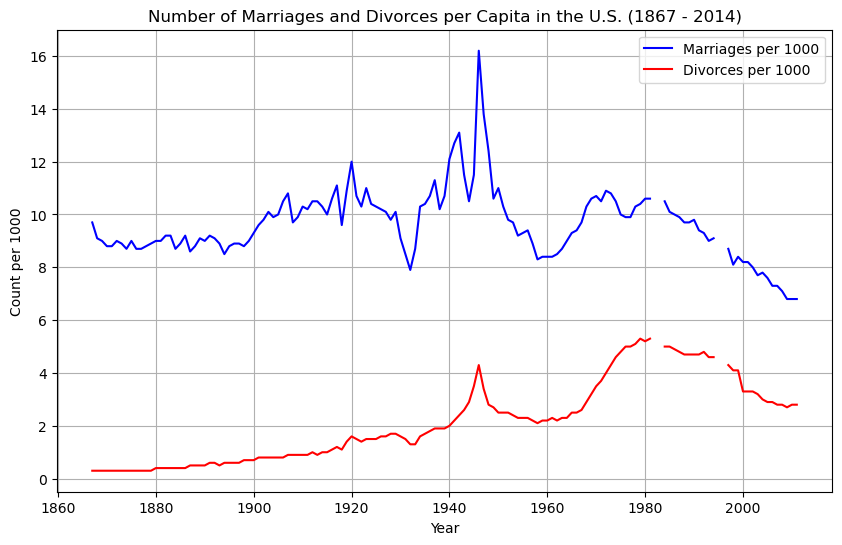

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# Extracting necessary columns
years = data['Year']
marriages_per_1000 = data['Marriages_per_1000']
divorces_per_1000 = data['Divorces_per_1000']

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(years, marriages_per_1000, label='Marriages per 1000', color='blue')
plt.plot(years, divorces_per_1000, label='Divorces per 1000', color='red')
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1867 - 2014)')
plt.xlabel('Year')
plt.ylabel('Count per 1000')
plt.legend()
plt.grid(True)
plt.show()


# Question 7
### Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
### Don't forget to label your axes!

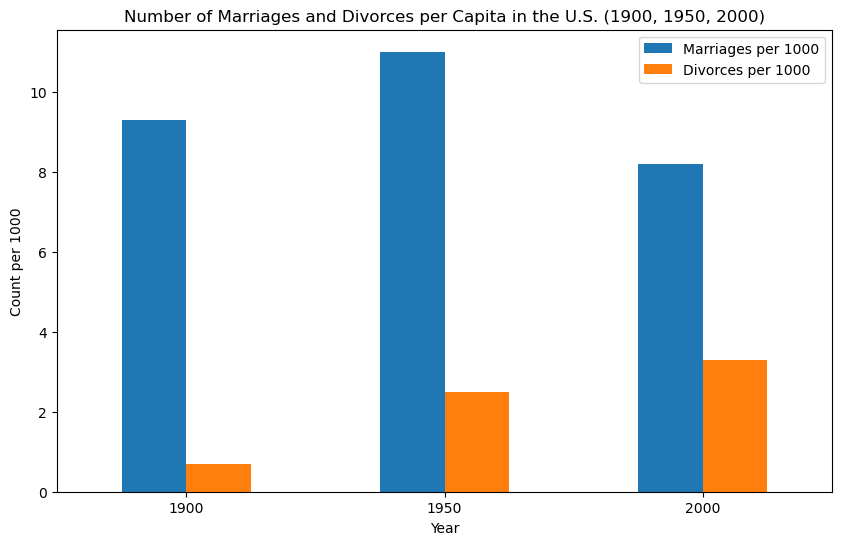

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# Filter data for the years 1900, 1950, and 2000
years = [1900, 1950, 2000]
filtered_data = data[data['Year'].isin(years)]

# Extracting necessary columns for the filtered years
filtered_data = filtered_data[['Year', 'Marriages_per_1000', 'Divorces_per_1000']]
filtered_data = filtered_data.set_index('Year')

# Plotting the data
filtered_data.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
plt.xlabel('Year')
plt.ylabel('Count per 1000')
plt.legend(['Marriages per 1000', 'Divorces per 1000'])
plt.xticks(rotation=0)
plt.show()

# Question 8 Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

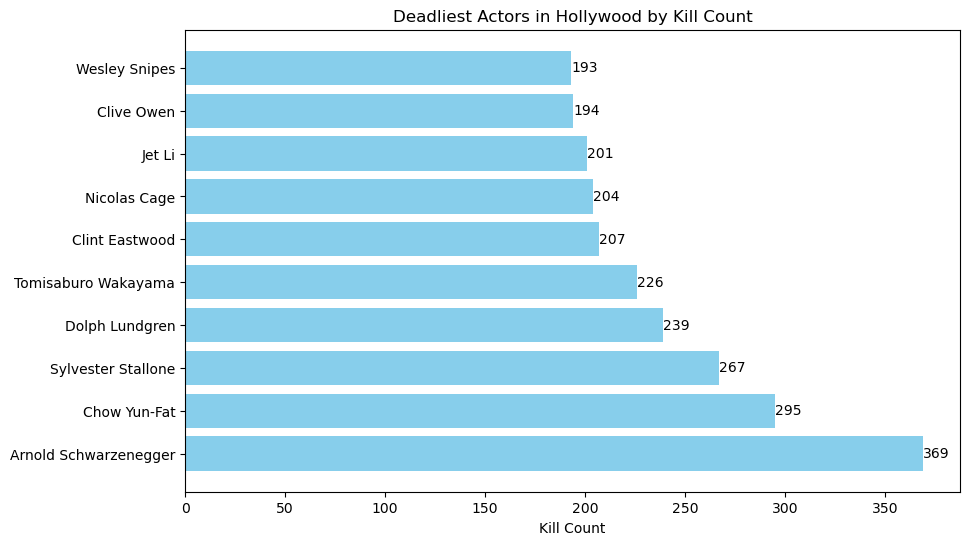

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('actor_kill_counts.csv')

# Sort the data by 'Count' column
data = data.sort_values(by='Count', ascending=True)

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(data['Actor'], data['Count'], color='skyblue')
plt.xlabel('Kill Count')
plt.title('Deadliest Actors in Hollywood by Kill Count')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top

# Labeling each bar with the corresponding actor's name
for index, value in enumerate(data['Count']):
    plt.text(value, index, str(value), va='center')

plt.show()


# Question 9
### Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
### Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

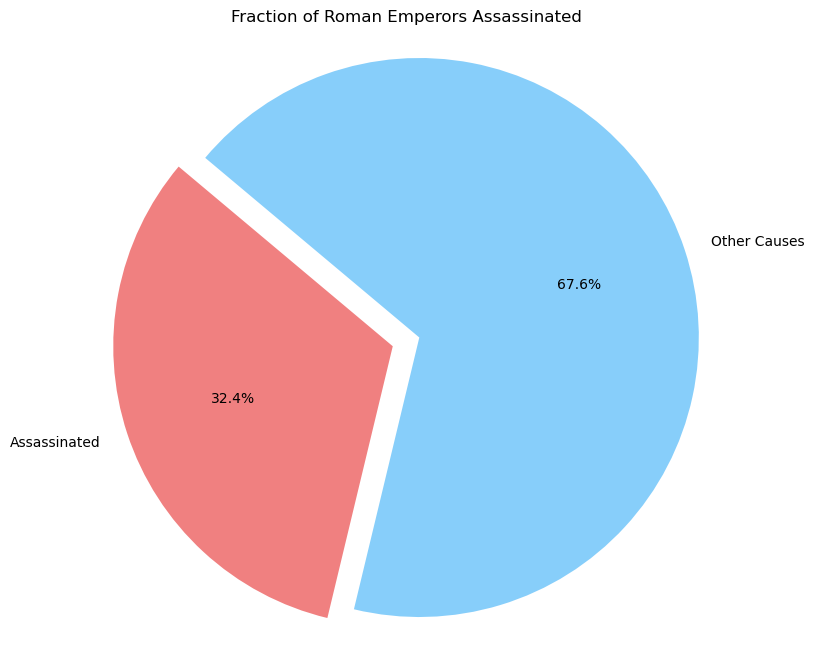

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('roman-emperor-reigns.csv')

# Count the occurrences of 'Assassinated' in the 'Cause_of_Death' column
assassinated_count = data['Cause_of_Death'].value_counts()['Assassinated']

# Count the total number of emperors
total_emperors = len(data)

# Calculate the percentage of emperors assassinated
percentage_assassinated = (assassinated_count / total_emperors) * 100

# Calculate the percentage of emperors who died from other causes
percentage_other = 100 - percentage_assassinated

# Create a pie chart
labels = ['Assassinated', 'Other Causes']
sizes = [percentage_assassinated, percentage_other]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # Explode the 'Assassinated' slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Fraction of Roman Emperors Assassinated')

plt.show()

# Question 10
### Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
### Don't forget to label your axes!
### Color each dot according to its year.

C:\Users\pritam\AppData\Local\Temp\ipykernel_24368\3950853382.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(revenue[i], doctorates[i], label=year, cmap='viridis', edgecolor='black')


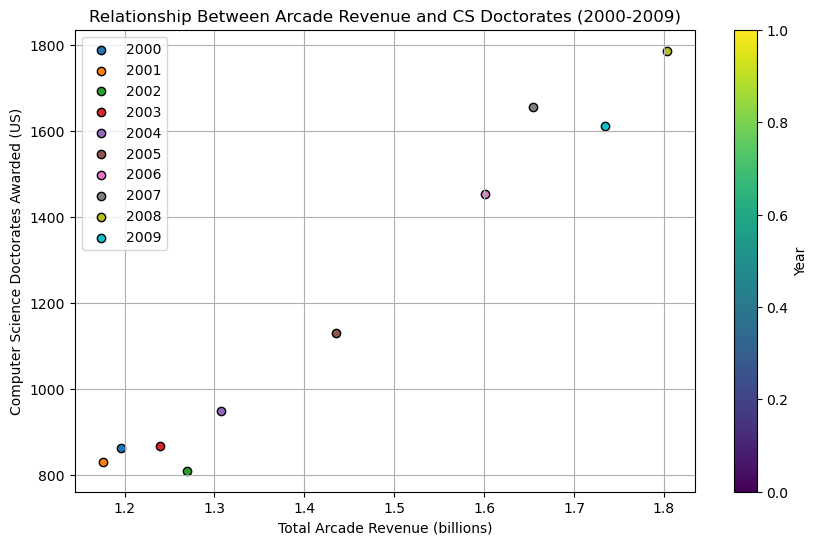

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

# Extracting data for plotting
revenue = data['Total Arcade Revenue (billions)']
doctorates = data['Computer Science Doctorates Awarded (US)']
years = data['Year']

# Creating a scatter plot
plt.figure(figsize=(10, 6))
for i, year in enumerate(years):
    plt.scatter(revenue[i], doctorates[i], label=year, cmap='viridis', edgecolor='black')

plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship Between Arcade Revenue and CS Doctorates (2000-2009)')
plt.colorbar(label='Year')
plt.legend()
plt.grid(True)

plt.show()